In [79]:
import pandas as pd
import numpy as np

In [80]:
data = pd.read_csv('train.csv')

In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
data.shape

(891, 12)

In [83]:
data = data.drop(columns=['Name','Ticket','Cabin'])

In [84]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [86]:
data = data.dropna()

In [87]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [88]:
data = pd.get_dummies(data,columns=['Sex','Embarked'])

In [89]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [90]:
data.shape

(712, 12)

In [91]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [92]:
x.shape

(712, 11)

In [93]:
y.shape

(712,)

# step 1 - standardize the input data

In [94]:
# Mean
x_mean = x.mean()

# Standard deviation
x_std = x.std()

# Standardization
z = (x - x_mean) / x_std

z.shape


(712, 11)

In [95]:
x.shape

(712, 11)

# step 2 - find covariance matrix

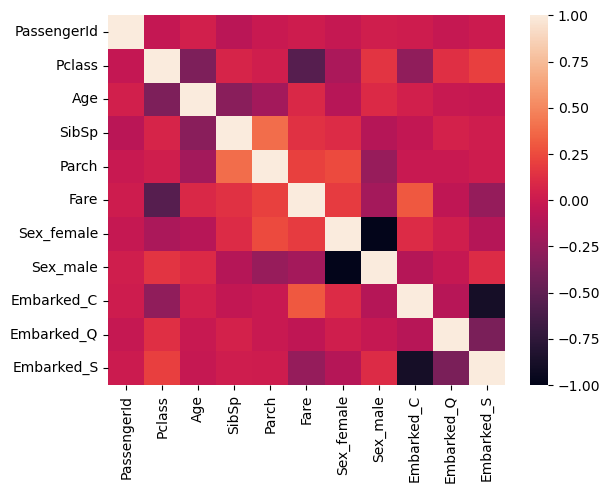

(11, 11)

In [96]:
# covariance
c = z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()
c.shape

# step 3 - find eigen values and eigen vectors

In [97]:
eigen_values,eigen_vector = np.linalg.eig(c)

print('shape of eigen_values = ',eigen_values.shape)
print("\neigen_values \n",eigen_values)
print('\n\nshape of eigen_vector = ',eigen_vector.shape)
print("\neigen_vector \n",eigen_vector)

shape of eigen_values =  (11,)

eigen_values 
 [2.59746694e+00 2.04662339e+00 1.51525777e+00 1.29655453e+00
 1.00258307e+00 9.71296476e-01 3.55371404e-01 6.58385283e-01
 5.56461141e-01 1.73807661e-17 1.14036623e-15]


shape of eigen_vector =  (11, 11)

eigen_vector 
 [[ 1.08888989e-02 -7.21437403e-02  1.02872626e-01 -4.02736996e-02
  -8.31277440e-01  5.28157101e-01  1.84201644e-02 -5.08591963e-02
  -9.78462995e-02  5.99228624e-19 -8.67668668e-18]
 [ 3.23290139e-01  2.91525274e-01 -4.00095800e-01 -2.00681715e-01
  -1.50756862e-01 -1.37018678e-01  7.16249151e-01  2.32780977e-01
   3.80147639e-02 -9.65488062e-18  2.40983037e-16]
 [-1.09701875e-02 -3.68907638e-01  3.97792790e-01 -1.29776501e-01
   2.81387192e-01  2.71022521e-01  3.00950307e-01  5.30898422e-01
  -4.04536260e-01  5.50990436e-17  6.30062108e-17]
 [-1.11617271e-01  3.38284201e-01 -2.35758284e-01  4.95760877e-01
   9.17400449e-02  1.25786927e-01  5.39902041e-02 -1.61529413e-01
  -7.20068947e-01 -6.08146883e-17  5.20908157e-17]


# step 4 -  Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly

In [98]:
# Index the eigenvalues in descending order 
idx = eigen_values.argsort()[::-1]
  
idx

array([ 0,  1,  2,  3,  4,  5,  7,  8,  6, 10,  9], dtype=int64)

In [99]:
# Sort the eigenvalues in descending order 
eigen_values = eigen_values[idx]
  
eigen_values

array([2.59746694e+00, 2.04662339e+00, 1.51525777e+00, 1.29655453e+00,
       1.00258307e+00, 9.71296476e-01, 6.58385283e-01, 5.56461141e-01,
       3.55371404e-01, 1.14036623e-15, 1.73807661e-17])

In [100]:
# sort the corresponding eigenvectors accordingly
eigen_vector = eigen_vector[:,idx]
eigen_vector

array([[ 1.08888989e-02, -7.21437403e-02,  1.02872626e-01,
        -4.02736996e-02, -8.31277440e-01,  5.28157101e-01,
        -5.08591963e-02, -9.78462995e-02,  1.84201644e-02,
        -8.67668668e-18,  5.99228624e-19],
       [ 3.23290139e-01,  2.91525274e-01, -4.00095800e-01,
        -2.00681715e-01, -1.50756862e-01, -1.37018678e-01,
         2.32780977e-01,  3.80147639e-02,  7.16249151e-01,
         2.40983037e-16, -9.65488062e-18],
       [-1.09701875e-02, -3.68907638e-01,  3.97792790e-01,
        -1.29776501e-01,  2.81387192e-01,  2.71022521e-01,
         5.30898422e-01, -4.04536260e-01,  3.00950307e-01,
         6.30062108e-17,  5.50990436e-17],
       [-1.11617271e-01,  3.38284201e-01, -2.35758284e-01,
         4.95760877e-01,  9.17400449e-02,  1.25786927e-01,
        -1.61529413e-01, -7.20068947e-01,  5.39902041e-02,
         5.20908157e-17, -6.08146883e-17],
       [-2.02521933e-01,  3.50823113e-01, -7.11246648e-02,
         3.96242986e-01, -3.31448583e-02,  1.82295607e-01,
  

# step 5 -  Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

In [101]:
 np.cumsum(eigen_values)

array([ 2.59746694,  4.64409033,  6.1593481 ,  7.45590263,  8.4584857 ,
        9.42978217, 10.08816745, 10.6446286 , 11.        , 11.        ,
       11.        ])

In [102]:
np.sum(eigen_values)

11.000000000000004

In [103]:
explained_var = np.cumsum(eigen_values) / np.sum(eigen_values)
explained_var

array([0.23613336, 0.42219003, 0.55994074, 0.67780933, 0.76895325,
       0.85725292, 0.91710613, 0.96769351, 1.        , 1.        ,
       1.        ])

# step 6 - Determine the Number of Principal Components 

In [104]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


3

# step 7 - Project the Data onto the Selected Principal Components

In [105]:
u = eigen_vector[:,:n_components]
u.shape

(11, 3)

In [111]:
x.columns.to_numpy(),

(array(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
        'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
       dtype=object),)

In [112]:
pca_component = pd.DataFrame(u,
                             index = x.columns.to_numpy(),
                             columns = ['PC1','PC2','PC3']
                            )

In [113]:
# Matrix multiplication or dot Product
z_pca = z @ pca_component                     # @ is used for matrix multiplication

z_pca = pd.DataFrame(z_pca.values,
					columns = ['PCA1','PCA2','PC3']
							)
z_pca.head()

,PCA1,PCA2,PC3
0,1.590135,0.467113,-0.715841
1,-3.436511,-1.088089,-0.266590
2,-0.133867,1.501288,0.376635
3,-1.359486,0.822541,1.486227
4,1.694614,-0.230441,-0.101299


In [114]:
z_pca

,PCA1,PCA2,PC3
0,1.590135,0.467113,-0.715841
1,-3.436511,-1.088089,-0.266590
2,-0.133867,1.501288,0.376635
3,-1.359486,0.822541,1.486227
4,1.694614,-0.230441,-0.101299
...,...,...,...
707,-2.597879,2.066608,-2.718267
708,1.315728,-0.633870,0.525424
709,-1.023390,0.679184,1.570478
710,-1.135829,-2.789394,-0.861271


In [115]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test = train_test_split(z_pca,y,test_size=0.20,random_state=10)

In [118]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score

print("accuracy_score = ",accuracy_score(y_pred,y_test))

accuracy_score =  0.7902097902097902


# PCA BY USING SKLEARN LIBRARY

In [168]:
from sklearn.decomposition import PCA

In [169]:
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size=0.20,random_state=10)

In [170]:
pca = PCA(n_components=3)

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [171]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)



LogisticRegression()

In [172]:
y_pred = lr.predict(x_test)

In [173]:
from sklearn.metrics import accuracy_score

print("accuracy_score = ",accuracy_score(y_pred,y_test))

accuracy_score =  0.8041958041958042
